<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/case4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statistics as sts
import numpy as np
import statsmodels.formula.api as smf

# Fase 1. Analise DESCRITIVA dos dados.

Nessa fase exploraremos o nosso data set usando a biblioteca Pandas.
* O primeiro passo a se realiza é a realizar a importacao do arquivo utilizando a a funcao .read_"tipo do formato"("loca/nomedoarquivo.extensao do arquivo") , caso nessa etapa no data frame nao for exportado com o devido espacamento ou divisao das colunas, deveremos indetificar qual e o tipo de separacao que existe, passando o paramentro sep="a separacao"
* Apos importar o nosso dataset, poderemos a iniciar as primeiras exploracoes usando .HEAD(), que nos trara as primeiras 5 linhas do nosso data set, ou a quantidade de linha que quisermos caso queiramos ter mais mais que 5 ou menos que 5 linhas
* Nas celulas abaixo, vamos utilizar os seguintes comandos.INFO, ISNULL, DUPLICATED, ISNA
1. Utilizaremos a função info para conhecer os tipos dos dados e a quantidade de valores não nulos.
2. Podemos utilizar o comando isnull().sum() para verificar se existem valores nulos no dataset.
3. O comando isna().sum(), nos traz valores ausentes e somatoria das mesmas.
4. Podemos utilizar o comando duplicated().sum() para verificar se existem valores duplicados.

In [ ]:
#importando arquivo
mkt=pd.read_csv("/Users/chenyenpin/Downloads/MKT.csv")
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#buscado info do dataset
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
mkt.isna().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [ ]:
mkt.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [ ]:
mkt.duplicated().sum()

0

#  Fase 2. Analise EXPLORATORIA dos dados


* OBS:COMO NAO HOUVE VALORES DUPLICADOS, NA, NULL, ou fora do padrao. Nao vai ser preciso fazer qualquer tramaneto referente.
* Entendendo os valores passando o comando describe(), porem dentro desse comando passaremos os percentils de 1%, 10%, 25%, 50%, 75%, 90%, 99%) alem dos valores padroes que do describe ja nos traz que sao a media, mediana, minimo
* Usando boxplots na identificar caso haja algum valor fora do normal( outliers)
* Determinando a correlacao dos dados
* Plotando grafico de correlacao usando HEATMAP
* Entendendo como estao as distribuicoes dos valores usando graficos de barras
* Analisando os as densidades dos dados num grafico de dispersao
* Identificacao dos outliers usando a filtro loc[]>100, para o newspaper, e a decisao de nao retira-los pois nela pois a media e a mediana se encontram em valores muito proximos, levando a entender que esses valores nao interfiram tanto nas distribuicoes.
  

In [ ]:
#entendendo valores
mkt.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
youtube,171.0,178.021053,102.449597,0.84,6.012,30.72,91.08,179.76,262.98,315.24,351.732,355.68
facebook,171.0,27.671579,17.913532,0.00,0.444,4.08,11.70,26.76,43.68,52.20,59.280,59.52
newspaper,171.0,35.240000,24.902918,0.36,1.752,7.08,13.74,31.08,50.88,70.44,103.416,121.08
sales,171.0,16.922807,6.314608,1.92,5.604,9.60,12.54,15.48,20.82,26.04,30.852,32.40


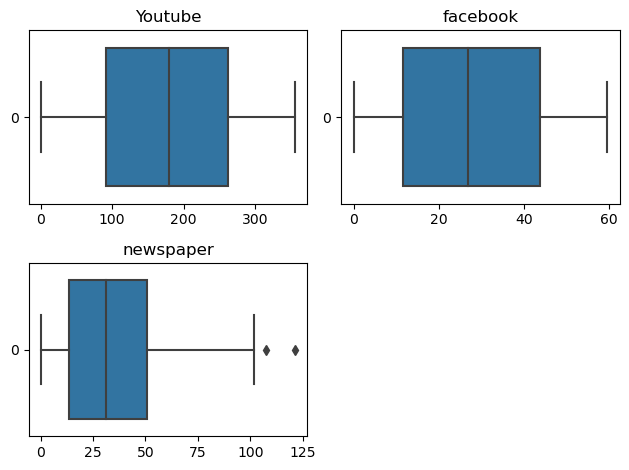

In [ ]:
#entendeo se existem outlies
plt.subplot(2,2,1)
sns.boxplot(data=mkt["youtube"], orient="h").set(title="Youtube")
plt.subplot(2,2,2)
sns.boxplot(data=mkt["facebook"], orient="h").set(title="facebook")
plt.subplot(2,2,3)
sns.boxplot(data=mkt["newspaper"],orient="h").set(title="newspaper")
plt.tight_layout()

In [ ]:
#entendo as correlacoes entre o dadoso target "sales"
mkt_corr=mkt.corr()
mkt_corr

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


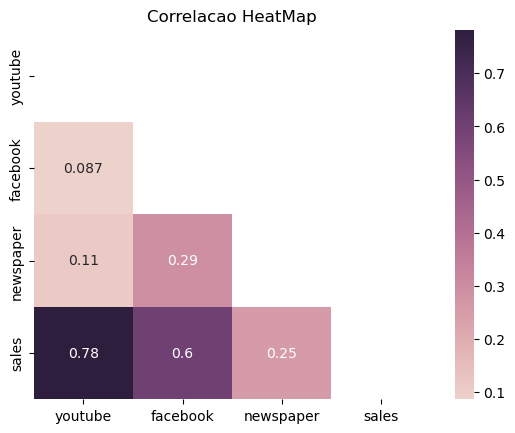

In [ ]:
#gerando o heatmap dos coeficiente de correlacao
#boa correlacao entre SALE c/ youtube e sales com facebook porem relacao baixa de sales com Newspaper
mask = np.triu(np.ones_like(mkt_corr))

sns.heatmap(mkt_corr, mask=mask, annot=True, cmap=sns.cubehelix_palette(as_cmap=True)).set(title="Correlacao HeatMap")
plt.show()

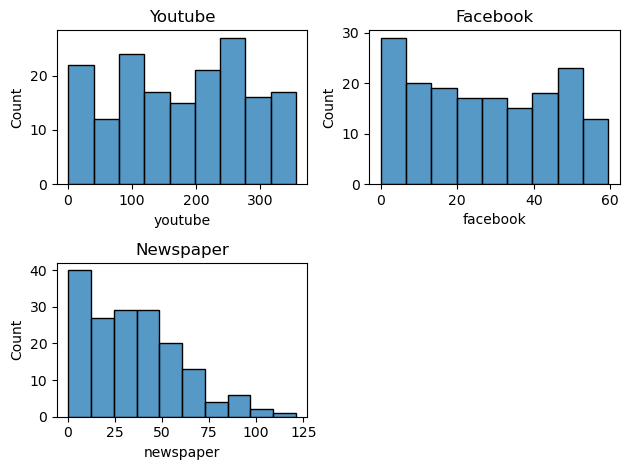

In [ ]:
#entendendo as distribuicoes

plt.subplot(2,2,1)
sns.histplot(data=mkt["youtube"]).set(title="Youtube")
plt.subplot(2,2,2)
sns.histplot(data=mkt["facebook"]).set(title="Facebook")
plt.subplot(2,2,3)
sns.histplot(data=mkt["newspaper"]).set(title="Newspaper")
plt.tight_layout()

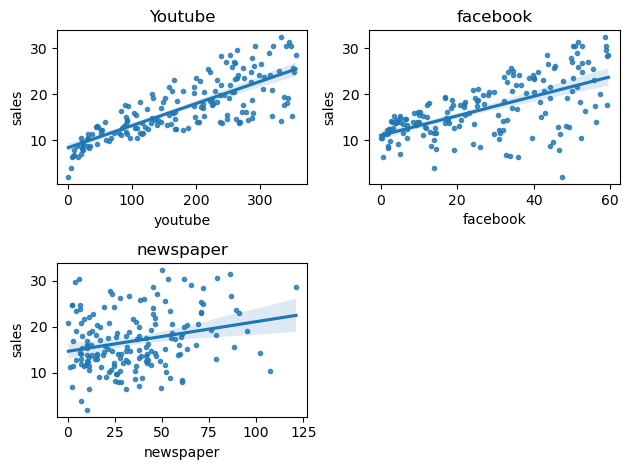

In [ ]:
#entendendo grafico de dispercao

plt.subplot(2,2,1)
sns.regplot(data=mkt["youtube"], x=mkt["youtube"], y=mkt["sales"],marker=".", fit_reg=True).set(title="Youtube")
plt.subplot(2,2,2)
sns.regplot(data=mkt["facebook"],x=mkt["facebook"], y=mkt["sales"],marker=".",fit_reg=True).set(title="facebook")
plt.subplot(2,2,3)
sns.regplot(data=mkt["newspaper"],x=mkt["newspaper"], y=mkt["sales"],marker=".",fit_reg=True).set(title="newspaper")
plt.tight_layout()

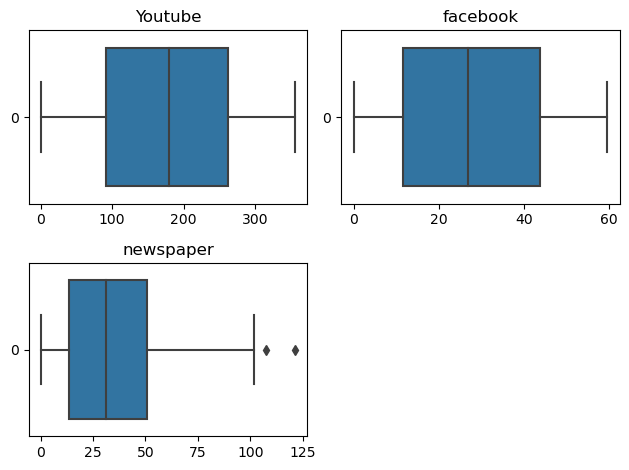

In [ ]:
#visualizando os outliers
plt.subplot(2,2,1)
sns.boxplot(data=mkt["youtube"], orient="h").set(title="Youtube")
plt.subplot(2,2,2)
sns.boxplot(data=mkt["facebook"], orient="h").set(title="facebook")
plt.subplot(2,2,3)
sns.boxplot(data=mkt["newspaper"],orient="h").set(title="newspaper")
plt.tight_layout()

In [ ]:
#identificando outliers newspaper
mkt.loc[mkt['newspaper'] > 100, 'newspaper']

46     107.28
72     121.08
136    101.76
Name: newspaper, dtype: float64

# Modelagem dos dados
* Primeiro passo dividiremos nosso dataset em x, y, sendo que Y sao e a coluna *TARGET*
* Separando em _x_train_, _x_test_, _y_train_, _y_test_, numa proporcao de de *80%* treino e *20%* teste como 42 de *random state*
* criacao de uma variavel chamada *LR* para o modelo e treinamento do modelo
* avaliacao do R^2 do modelo treino denominado de *LRsq*
* previsao do modelo LR de test usando usando o variavel *y_pred_train*
* Treinando o modelo usando o _x_test_ e _y_test_
* avaliacao  R^2 do modelo teste
* predicao do modelo *y_pred_test
* comparacao com o do R^2 com o R^2 ajustado do modelo estatistico  OLS

In [ ]:
#modelagem
x=mkt.drop(columns=["sales"])
y=mkt["sales"].to_frame(name="sales")

In [ ]:
#entendedo se a divisao foi feito de maneira correta
display(x, y)

,youtube,facebook,newspaper
0,84.72,19.20,48.96
1,351.48,33.96,51.84
2,135.48,20.88,46.32
3,116.64,1.80,36.00
4,318.72,24.00,0.36
...,...,...,...
166,45.84,4.44,16.56
167,113.04,5.88,9.72
168,212.40,11.16,7.68
169,340.32,50.40,79.44


,sales
0,12.60
1,25.68
2,14.28
3,11.52
4,20.88
...,...
166,9.12
167,11.64
168,15.36
169,30.60


In [ ]:
#separando entre x teste, x treino y test, y treino
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#treinando os x_train e o y_train
LR=LinearRegression().fit(x_train, y_train)

In [ ]:
#calculando o R2 do train treino
LR_sq=LR.score(x_train, y_train)
LR_sq

0.9074962891333168

In [ ]:
#predicao do Treino
y_pred_train=LR.predict(x_train)

In [ ]:

LR=LinearRegression().fit(x_test, y_test)

In [ ]:
#calulando R2 de test
LR_sq=LR.score(x_test, y_test)
LR_sq

0.8925835445734595

In [ ]:
#prevendo o resulto do Teste
y_pred_test=LR.predict(x_test)

In [ ]:
#comparando com modelo estatistico OLS, usando metodo BACKWARK
function="sales~youtube+facebook"
model=smf.ols(formula=function, data=mkt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     757.8
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           8.33e-85
Time:                        23:51:56   Log-Likelihood:                -360.21
No. Observations:                 171   AIC:                             726.4
Df Residuals:                     168   BIC:                             735.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5937      0.376      9.555      0.0

# Grafico e tabela de predicao x teste
* Comparacao de valores do valor *TARGET(y)* com o valor predito pelo modelo
* Mostrando os valores previstos pelo modelo


<AxesSubplot:>

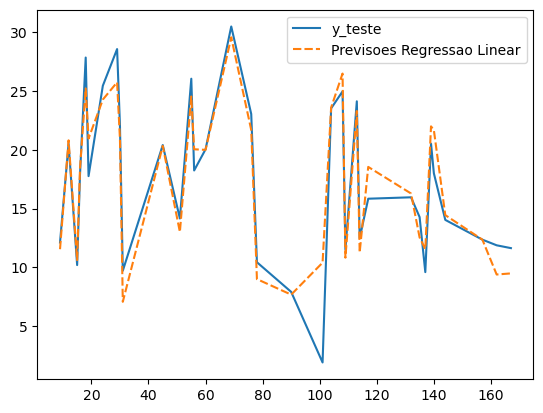

In [ ]:
#comparacao com o dados fornecidos com o regressao linear e a terceira linha o residuo
tabela = pd.DataFrame()
tabela["y_teste"] = y_test
tabela["Previsoes Regressao Linear"] = y_pred_test
sns.lineplot(data=tabela)

In [ ]:
tabela


,y_teste,Previsoes Regressao Linear
101,1.92,10.404581
55,26.04,24.528014
56,18.24,20.040934
139,20.52,21.990620
157,12.36,12.360362
78,10.44,9.007425
135,14.28,12.545734
104,23.52,23.587688
109,11.52,10.828551
108,24.96,26.479141


# Normalizando o dados para comparacao com modelo nao normalizado
* Utilizando o metodo *MinMaxScaler*
* Definindo uma variavel scaler
* Modelando os dados treinando o determinando o R^2

In [ ]:
#normalizando os valores para ver pode haver alguma diferenca no resultado final
scaler=MinMaxScaler()

In [ ]:
mkt_norm=pd.DataFrame(scaler.fit_transform(mkt), index=mkt.index, columns=mkt.columns)

mkt_norm.head()


,youtube,facebook,newspaper,sales
0,0.236388,0.322581,0.402584,0.350394
1,0.988164,0.570565,0.426441,0.779528
2,0.379439,0.350806,0.380716,0.405512
3,0.326344,0.030242,0.295229,0.314961
4,0.895840,0.403226,0.000000,0.622047


In [ ]:
x=mkt_norm.drop(columns=["sales"])
y=mkt_norm["sales"].to_frame(name="sales")


In [ ]:
#Fit do modelo
norm=LinearRegression()
x_test,x_train,y_test,y_train=train_test_split(x,y, test_size=0.2, random_state=42)
norm.fit(x_train, y_train)
norm.fit(x_test, y_test)
normsq=norm.score(x_test, y_test)
normsq

0.9074962891333168